# Initialization

In [1]:
# Load dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set the style for the plot
sns.set(style="whitegrid")

In [3]:
# Ingest data
df = pd.read_csv('../input/covid-vaccinations-2023/CovidVaccinations2023.csv')
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,World,72%,67%,35,2716491503,173.0,13270170332
1,Macau,>99%,>99%,76,477572,285.0,1797836
2,Brunei,>99%,>99%,78,340030,298.0,1289036
3,U.A.E.,>99%,>99%,53,5138699,255.0,24922054
4,Qatar,>99%,>99%,67,1903612,269.0,7606840
...,...,...,...,...,...,...,...
183,Madagascar,8.6%,8.3%,0,126788,9.8,2652348
184,Papua New Guinea,4.2%,3.6%,0,32902,8.2,717736
185,Haiti,3.60%,2.10%,–,–,4.6,515718
186,Yemen,3.5%,2.6%,0,61249,4.3,1255304


# Data pre-processing

In [4]:
# Replace "–" with " " and ">99%" with "99%" in selected columns
columns_to_replace = ["Vaccinated", "FullyVaccinated", "AdditionalDosesPer100people", "AdditionalDosesTotal"]
df[columns_to_replace] = df[columns_to_replace].replace({"–": " ", ">99%": "99%"})
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,World,72%,67%,35,2716491503,173.0,13270170332
1,Macau,99%,99%,76,477572,285.0,1797836
2,Brunei,99%,99%,78,340030,298.0,1289036
3,U.A.E.,99%,99%,53,5138699,255.0,24922054
4,Qatar,99%,99%,67,1903612,269.0,7606840
...,...,...,...,...,...,...,...
183,Madagascar,8.6%,8.3%,0,126788,9.8,2652348
184,Papua New Guinea,4.2%,3.6%,0,32902,8.2,717736
185,Haiti,3.60%,2.10%,,,4.6,515718
186,Yemen,3.5%,2.6%,0,61249,4.3,1255304


In [5]:
# Split columns containing percentage values, remove "%" and convert to numeric
percentage_columns = ["Vaccinated", "FullyVaccinated"]
for col in percentage_columns:
    df[col] = df[col].str.rstrip("%")
    df[col] = pd.to_numeric(df[col])
    df[col] /= 100
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,World,0.720,0.670,35,2716491503,173.0,13270170332
1,Macau,0.990,0.990,76,477572,285.0,1797836
2,Brunei,0.990,0.990,78,340030,298.0,1289036
3,U.A.E.,0.990,0.990,53,5138699,255.0,24922054
4,Qatar,0.990,0.990,67,1903612,269.0,7606840
...,...,...,...,...,...,...,...
183,Madagascar,0.086,0.083,0,126788,9.8,2652348
184,Papua New Guinea,0.042,0.036,0,32902,8.2,717736
185,Haiti,0.036,0.021,,,4.6,515718
186,Yemen,0.035,0.026,0,61249,4.3,1255304


In [6]:
# Convert selected columns to numeric after removing commas
numeric_columns = ["AdditionalDosesPer100people", "AdditionalDosesTotal"]
df[numeric_columns] = df[numeric_columns].replace({",": ""}, regex=True).apply(pd.to_numeric, errors="coerce")
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,World,0.720,0.670,35.0,2.716492e+09,173.0,13270170332
1,Macau,0.990,0.990,76.0,4.775720e+05,285.0,1797836
2,Brunei,0.990,0.990,78.0,3.400300e+05,298.0,1289036
3,U.A.E.,0.990,0.990,53.0,5.138699e+06,255.0,24922054
4,Qatar,0.990,0.990,67.0,1.903612e+06,269.0,7606840
...,...,...,...,...,...,...,...
183,Madagascar,0.086,0.083,0.0,1.267880e+05,9.8,2652348
184,Papua New Guinea,0.042,0.036,0.0,3.290200e+04,8.2,717736
185,Haiti,0.036,0.021,NaN,NaN,4.6,515718
186,Yemen,0.035,0.026,0.0,6.124900e+04,4.3,1255304


In [7]:
df.dtypes

Country                           object
Vaccinated                       float64
FullyVaccinated                  float64
AdditionalDosesPer100people      float64
AdditionalDosesTotal             float64
DosesAdministeredPer100people    float64
DosesAdministeredTotal             int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vaccinated,188.0,6.099574e-01,2.470613e-01,0.003,4.275000e-01,0.65,0.82,9.900000e-01
FullyVaccinated,188.0,5.565798e-01,2.484628e-01,0.003,3.500000e-01,0.58,0.76,9.900000e-01
AdditionalDosesPer100people,172.0,3.331395e+01,3.059900e+01,0.000,7.000000e+00,25.50,56.00,1.450000e+02
AdditionalDosesTotal,172.0,3.158491e+07,2.168986e+08,291.000,2.072498e+05,1539166.00,7433522.75,2.716492e+09
DosesAdministeredPer100people,188.0,1.437351e+02,8.244088e+01,0.300,7.275000e+01,143.00,207.25,3.850000e+02
DosesAdministeredTotal,188.0,1.411618e+08,1.011029e+09,34493.000,1.989807e+06,9957775.00,32777668.25,1.327017e+10


# Data visualization

/tmp/ipykernel_20/1671078801.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10.loc[:, 'Vaccinated'] = top_10.loc[:, 'Vaccinated'] * 100
/tmp/ipykernel_20/1671078801.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10.loc[:, 'FullyVaccinated'] = top_10.loc[:, 'FullyVaccinated'] * 100
/tmp/ipykernel_20/1671078801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

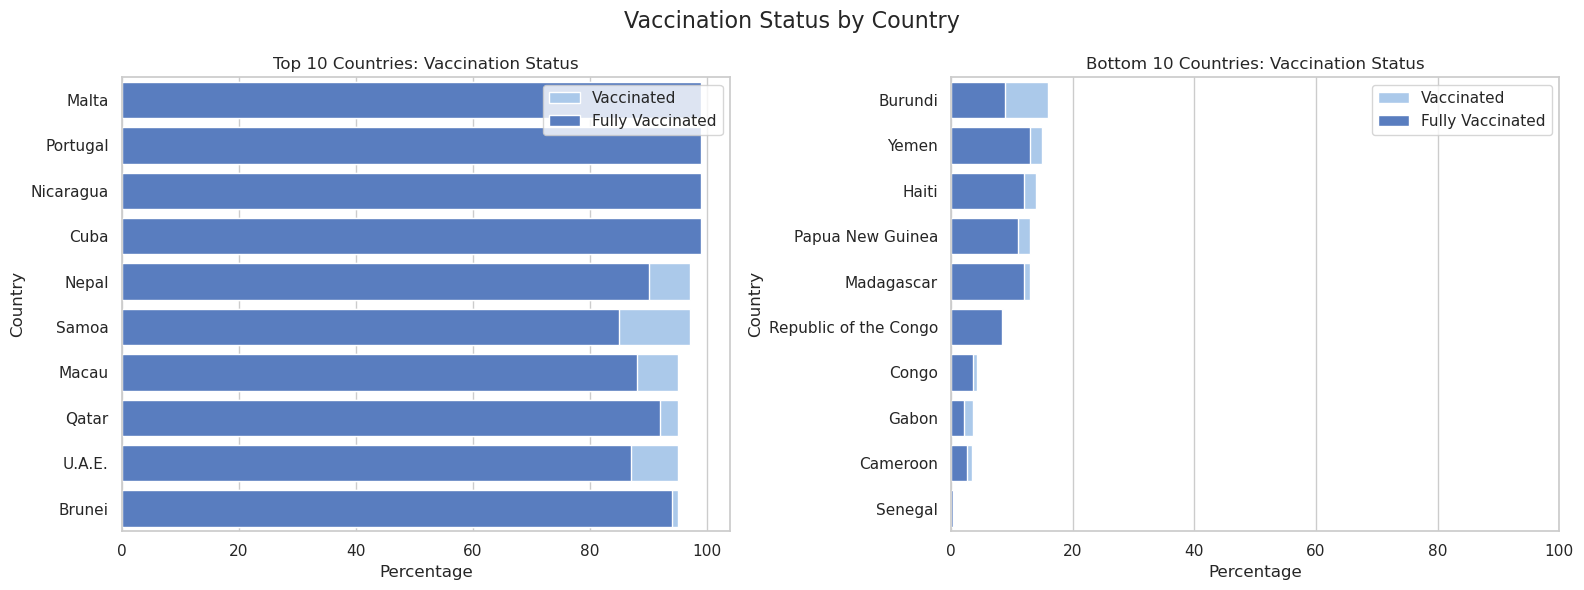

In [9]:
# Sort the DataFrame by the 'Vaccinated' column in descending order
df_sorted = df.sort_values(by='Vaccinated', ascending=False)

# Drop rows with missing data in the specified columns
df_sorted_cleaned = df_sorted.dropna(subset=['Vaccinated', 'FullyVaccinated'])
# Divide the DataFrame into top 10 and bottom 10
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Convert Vaccinated and FullyVaccinated to percentages using .loc indexer
top_10.loc[:, 'Vaccinated'] = top_10.loc[:, 'Vaccinated'] * 100
top_10.loc[:, 'FullyVaccinated'] = top_10.loc[:, 'FullyVaccinated'] * 100
bottom_10.loc[:, 'Vaccinated'] = bottom_10.loc[:, 'Vaccinated'] * 100
bottom_10.loc[:, 'FullyVaccinated'] = bottom_10.loc[:, 'FullyVaccinated'] * 100


# Set the style for the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 2 column 1 row structure

# Add the overall title
fig.suptitle("Vaccination Status by Country", fontsize=16)

# Create the top 10 bar plot with descending order
sns.set_color_codes("pastel")
sns.barplot(x='Vaccinated', y='Country', data=top_10, color='b', ax=axes[0], label='Vaccinated')
sns.set_color_codes("muted")
sns.barplot(x='FullyVaccinated', y='Country', data=top_10, color='b', ax=axes[0], label='Fully Vaccinated')

# Labeling and formatting for top 10
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Country')
axes[0].set_title('Top 10 Countries: Vaccination Status')
axes[0].legend()
axes[0].set_yticklabels(top_10['Country'][::-1])  # Reverse the order of y-axis labels

# Create the bottom 10 bar plot with descending order
sns.set_color_codes("pastel")
sns.barplot(x='Vaccinated', y='Country', data=bottom_10, color='b', ax=axes[1], label='Vaccinated')
sns.set_color_codes("muted")
sns.barplot(x='FullyVaccinated', y='Country', data=bottom_10, color='b', ax=axes[1], label='Fully Vaccinated')

# Labeling and formatting for bottom 10
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Country')
axes[1].set_title('Bottom 10 Countries: Vaccination Status')
axes[1].legend()
axes[1].set_yticklabels(bottom_10['Country'][::-1])  # Reverse the order of y-axis labels
axes[1].set_xlim(0, 100)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

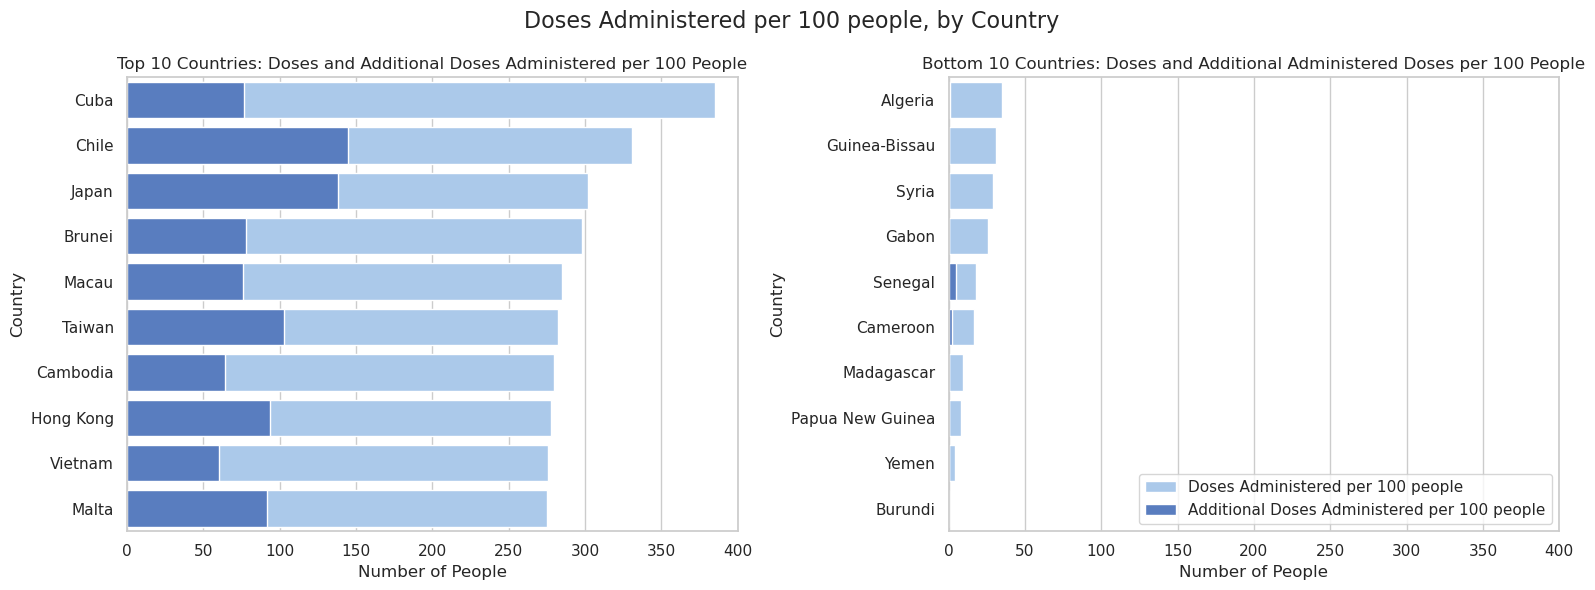

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by the 'DosesAdministeredPer100people' column in descending order
df_sorted = df.sort_values(by='DosesAdministeredPer100people', ascending=False)

# Drop rows with missing data in the specified columns
df_sorted_cleaned = df_sorted.dropna(subset=['DosesAdministeredPer100people', 'AdditionalDosesPer100people'])

# Divide the cleaned DataFrame into top 10 and bottom 10
top_10 = df_sorted_cleaned.head(10)
bottom_10 = df_sorted_cleaned.tail(10)

# Set the style for the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row 2 columns structure

# Add the overall title
fig.suptitle("Doses Administered per 100 people, by Country", fontsize=16)

# Create individual bar plots for top 10 countries
sns.set_color_codes("pastel")
sns.barplot(x='DosesAdministeredPer100people', y='Country', data=top_10, color='b', ax=axes[0], label="Doses Administered per 100 people")
sns.set_color_codes("muted")
sns.barplot(x='AdditionalDosesPer100people', y='Country', data=top_10, color='b', ax=axes[0], label = "Additional Doses Administered per 100 people")



# Create individual bar plots for bottom 10 countries
sns.set_color_codes("pastel")
sns.barplot(x='DosesAdministeredPer100people', y='Country', data=bottom_10, color='b', ax=axes[1], label="Doses Administered per 100 people")
sns.set_color_codes("muted")
sns.barplot(x='AdditionalDosesPer100people', y='Country', data=bottom_10, color='b', ax=axes[1], label = "Additional Doses Administered per 100 people")

# Set x-axis label for all plots
for ax in axes.flatten():
    ax.set_xlabel('Number of People')

# Set titles for each plot
axes[0].set_title('Top 10 Countries: Doses and Additional Doses Administered per 100 People')
axes[1].set_title('Bottom 10 Countries: Doses and Additional Administered Doses per 100 People')
axes[1].legend(loc='lower right')  # Set legend position for the second plot
axes[0].set_xlim(0, 400)
axes[1].set_xlim(0, 400)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


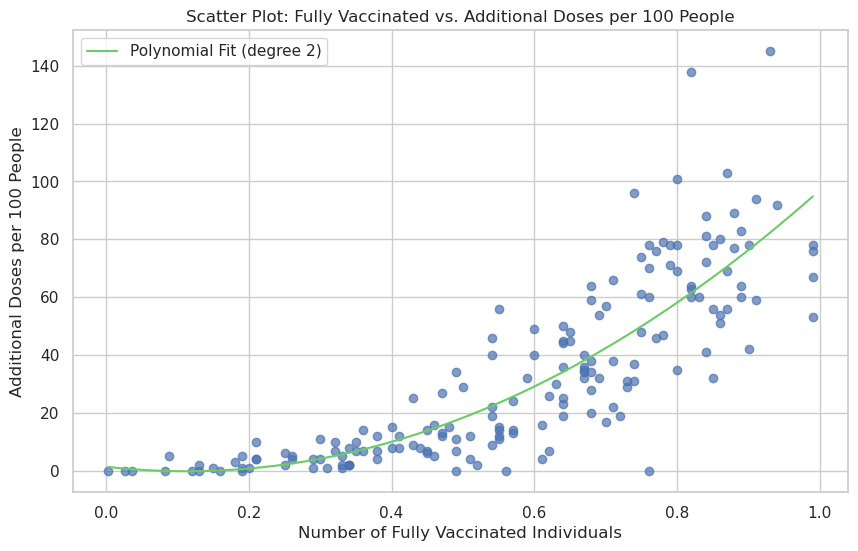

In [11]:
# Remove rows with missing values
df_cleaned = df.dropna(subset=['FullyVaccinated', 'AdditionalDosesPer100people'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['FullyVaccinated'], df_cleaned['AdditionalDosesPer100people'], alpha=0.7)
plt.title('Scatter Plot: Fully Vaccinated vs. Additional Doses per 100 People')
plt.xlabel('Number of Fully Vaccinated Individuals')
plt.ylabel('Additional Doses per 100 People')
plt.grid(True)

# Fit a polynomial regression line
degree = 2  # Degree of the polynomial (1 for linear regression)
coefficients = np.polyfit(df_cleaned['FullyVaccinated'], df_cleaned['AdditionalDosesPer100people'], degree)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted line
x_vals = np.linspace(df_cleaned['FullyVaccinated'].min(), df_cleaned['FullyVaccinated'].max(), num=100)

# Calculate corresponding y values using the polynomial
y_vals = polynomial(x_vals)

# Plot the polynomial fit line
plt.plot(x_vals, y_vals, color='g', label=f'Polynomial Fit (degree {degree})')
plt.legend()

plt.show()

/tmp/ipykernel_20/2037062308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


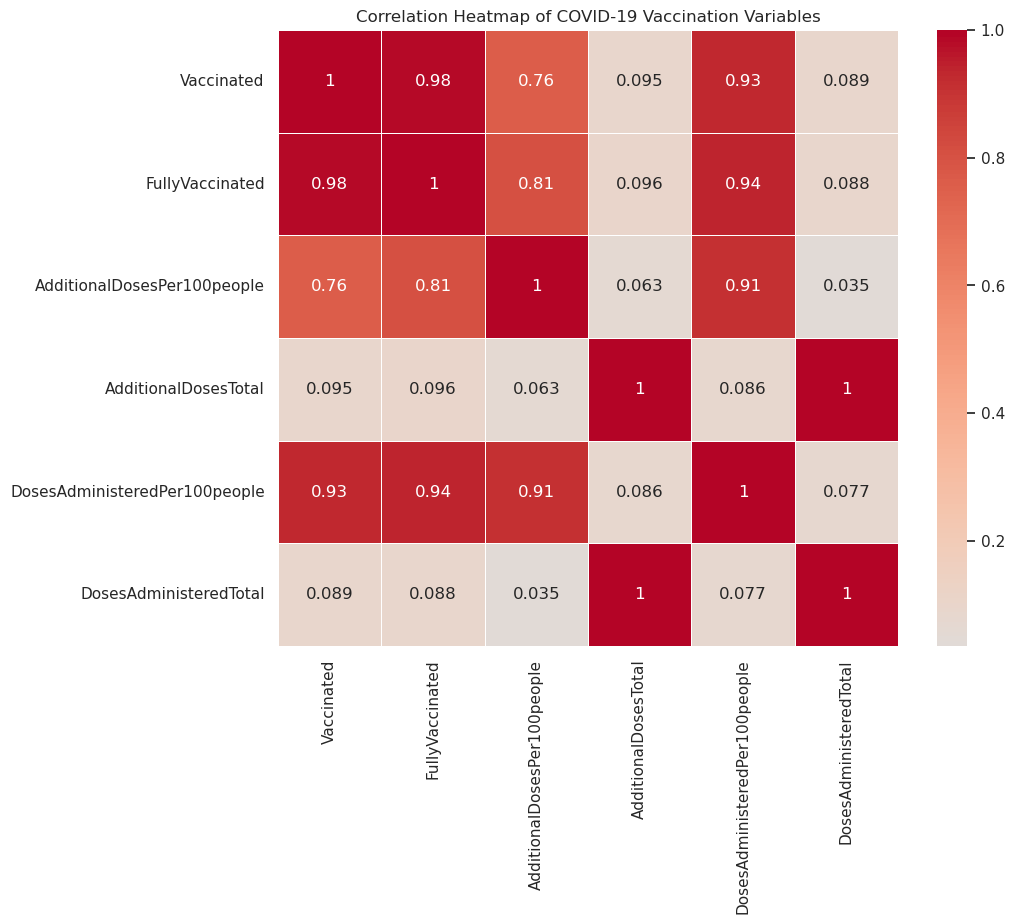

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of COVID-19 Vaccination Variables')

# Show the plot
plt.show()


In [13]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
world = gpd.read_file('../input/world-shapefile/ne_50m_admin_0_countries.shp')

In [15]:
merged_data = world.merge(df, left_on='SOVEREIGNT', right_on='Country', how='left')


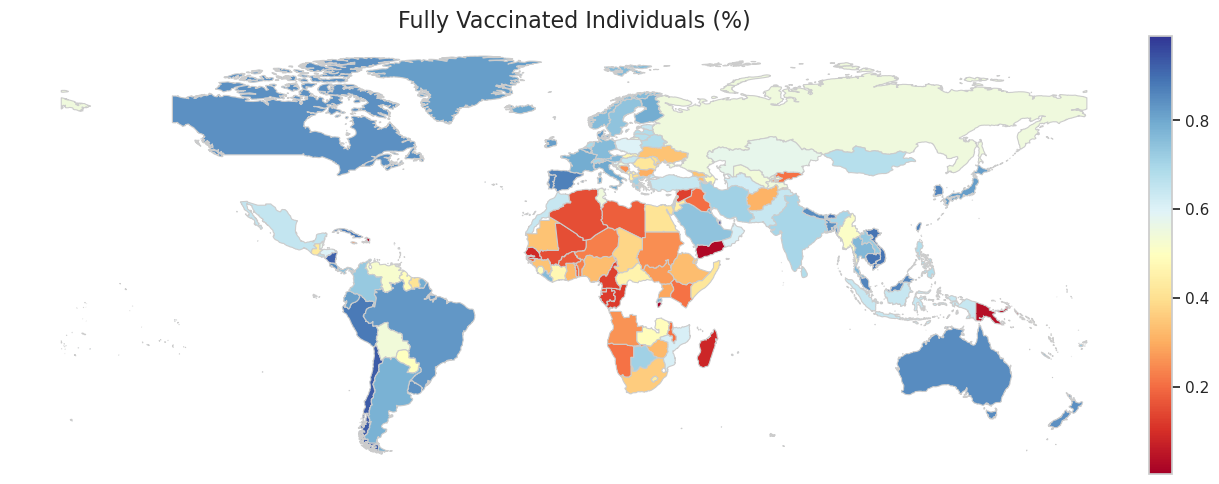

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)  # Adjust the size parameter

merged_data.plot(column='FullyVaccinated', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

ax.set_title('Fully Vaccinated Individuals (%)', fontdict={'fontsize': '16', 'fontweight' : '3'})

ax.set_axis_off()
plt.show()


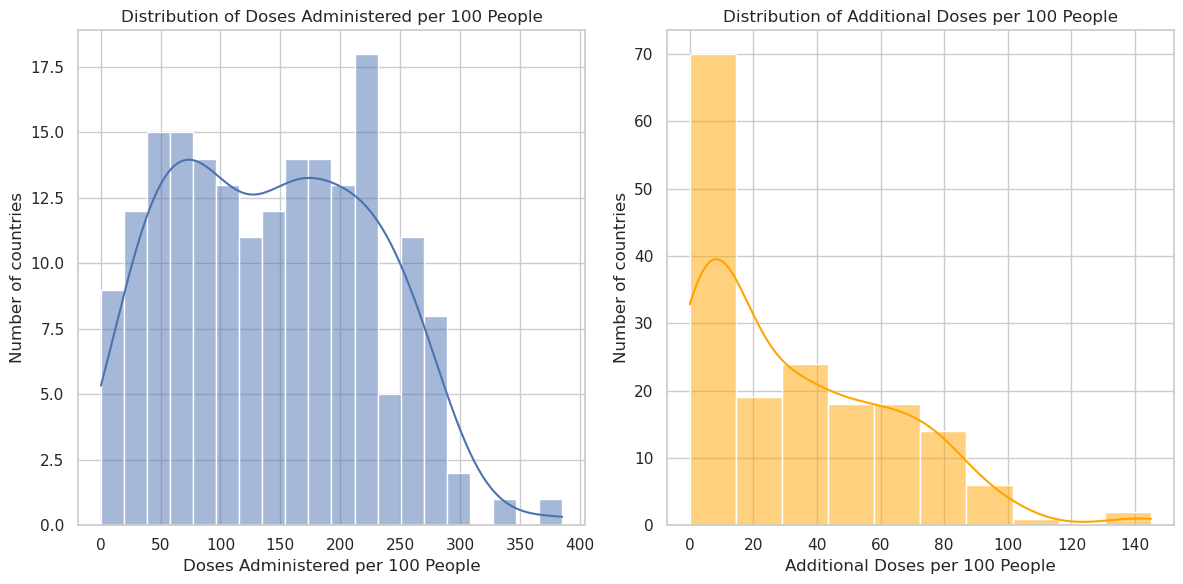

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histogram for doses administered per 100 people
sns.histplot(data=df, x='DosesAdministeredPer100people', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Doses Administered per 100 People')
axes[0].set_xlabel('Doses Administered per 100 People')
axes[0].set_ylabel('Number of countries')

# Create histogram for additional doses per 100 people
sns.histplot(data=df, x='AdditionalDosesPer100people', bins=10, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Additional Doses per 100 People')
axes[1].set_xlabel('Additional Doses per 100 People')
axes[1].set_ylabel('Number of countries')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

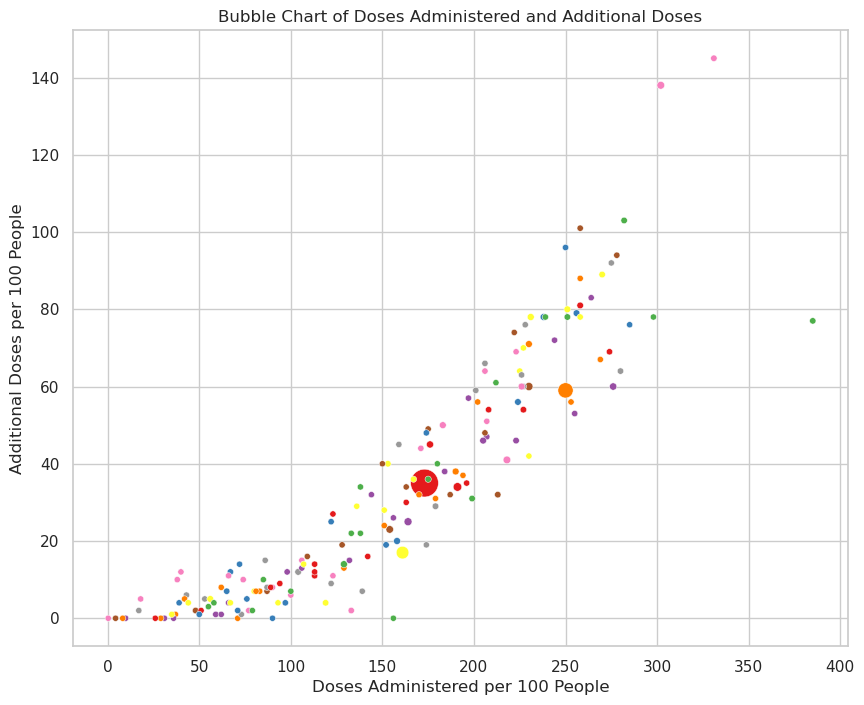

In [18]:
# Create the bubble chart
plt.figure(figsize=(10, 8))
sns.scatterplot(x='DosesAdministeredPer100people', y='AdditionalDosesPer100people', size='DosesAdministeredTotal', data=df, sizes=(20, 400), hue='Country', palette='Set1', legend = False)
plt.title('Bubble Chart of Doses Administered and Additional Doses')
plt.xlabel('Doses Administered per 100 People')
plt.ylabel('Additional Doses per 100 People')

# Show the plot
plt.show()